In [1]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['C:\\Users\\user\\PycharmProjects\\Open_Close_GNN'])

Python 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)] on win32


In [2]:
from model.dataset import OpenCloseDataset
from model.gnn_model import GCN, GATv2
import os
from model.utils import train, device, train_epoch, eval_epoch, cross_val
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import lr_scheduler
from torch_geometric.loader import DataLoader

from seaborn import heatmap

In [4]:
full_dataset = OpenCloseDataset(datafolder='../data/new', reload=True, k_degree=10).shuffle()
len(os.listdir('../data/new/processed'))

Processing...
Done!


170

In [31]:
full_dataset[0]

Data(x=[418, 418], edge_index=[2, 6098], edge_attr=[6098], y=0)

In [5]:
train_size = int(0.8 * len(full_dataset))
train_dataset, val_dataset = full_dataset[:train_size], full_dataset[train_size:]
val_dataset, test_dataset = val_dataset[:-15], val_dataset[-15:]

# len train - 134
# val - 19
# test - 15

In [38]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

## GCN

In [47]:
model = GCN(full_dataset.num_features, channels=[256, 32, 8], dropout=0.3).to(device())
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = torch.nn.CrossEntropyLoss()
epochs = 30
scheduler = lr_scheduler.StepLR(optimizer, step_size=epochs//3, gamma=0.1, last_epoch=-1, verbose=True)
sum(p.numel() for p in model.parameters())

Adjusting learning rate of group 0 to 1.0000e-03.


116346

In [48]:
history = train(model, epochs, train_loader, val_loader, loss, optimizer, scheduler=scheduler)

  0%|          | 0/30 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 001, Train Loss: 0.0814, Test Loss 0.1034, Train Acc: 0.6250, Test Acc: 0.5972
Test precision: 0.5556, Test recall: 1.0000
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 002, Train Loss: 0.0605, Test Loss 0.0938, Train Acc: 0.8946, Test Acc: 0.6389
Test precision: 0.5278, Test recall: 1.0000
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 003, Train Loss: 0.0374, Test Loss 0.0892, Train Acc: 1.0000, Test Acc: 0.7639
Test precision: 0.7000, Test recall: 0.9333
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 004, Train Loss: 0.0201, Test Loss 0.0935, Train Acc: 1.0000, Test Acc: 0.7222
Test precision: 0.6667, Test recall: 0.8222
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 005, Train Loss: 0.0100, Test Loss 0.0880, Train Acc: 1.0000, Test Acc: 0.5694
Test precision: 0.5833, Test recall: 0.6389
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 006, Train Loss: 0.0053, Test Loss 0.1024, 

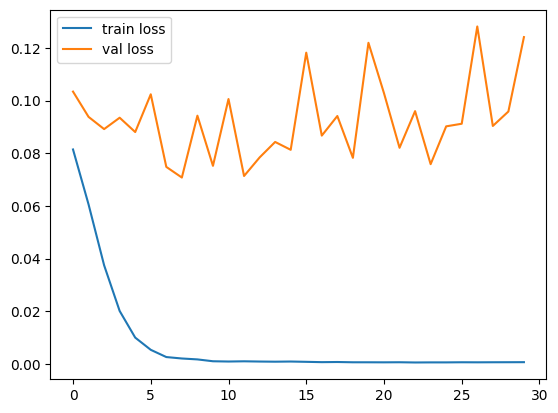

In [49]:
train_loss, val_loss, train_acc, test_acc = zip(*history)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend();

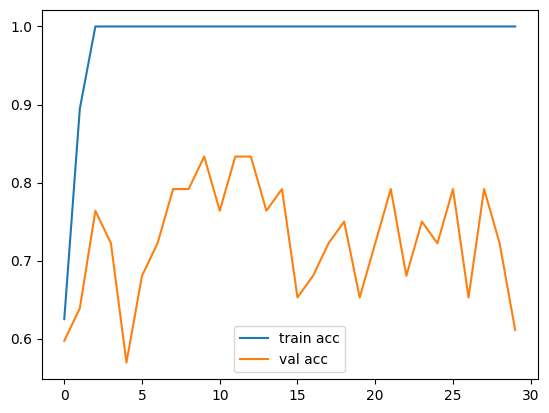

In [50]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='val acc')
plt.legend();

In [51]:
np.mean(test_acc)

0.7263888

In [52]:
test_loader = DataLoader(test_dataset)
eval_epoch(test_loader, model, loss)
# loss, acc, precision, recall

(0.7768831251654774, 0.6, 0.2, 0.2)

## GAT

In [84]:
model = GATv2(full_dataset.num_features, 128, 8, dropout=0.3).to(device())
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss = torch.nn.CrossEntropyLoss()
epochs = 30
scheduler = lr_scheduler.StepLR(optimizer, step_size=epochs//3, gamma=0.1, last_epoch=-1, verbose=False)
sum(p.numel() for p in model.parameters())

219698

In [85]:
history = train(model, epochs, train_loader, val_loader, loss, optimizer, scheduler=None)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 001, Train Loss: 0.0858, Test Loss 0.1140, Train Acc: 0.5686, Test Acc: 0.4861
Test precision: 0.4623, Test recall: 1.0000
Epoch: 002, Train Loss: 0.0796, Test Loss 0.1117, Train Acc: 0.6716, Test Acc: 0.5556
Test precision: 0.5258, Test recall: 1.0000
Epoch: 003, Train Loss: 0.0712, Test Loss 0.1054, Train Acc: 0.7206, Test Acc: 0.5556
Test precision: 0.5377, Test recall: 1.0000
Epoch: 004, Train Loss: 0.0651, Test Loss 0.1214, Train Acc: 0.7696, Test Acc: 0.4861
Test precision: 0.4683, Test recall: 1.0000
Epoch: 005, Train Loss: 0.0594, Test Loss 0.0937, Train Acc: 0.8186, Test Acc: 0.6250
Test precision: 0.6012, Test recall: 1.0000
Epoch: 006, Train Loss: 0.0540, Test Loss 0.0935, Train Acc: 0.8603, Test Acc: 0.6389
Test precision: 0.5794, Test recall: 1.0000
Epoch: 007, Train Loss: 0.0489, Test Loss 0.0964, Train Acc: 0.8676, Test Acc: 0.7083
Test precision: 0.6429, Test recall: 1.0000
Epoch: 008, Train Loss: 0.0444, Test Loss 0.0939, Train Acc: 0.8897, Test Acc: 0.6806
Test

In [86]:
test_loader = DataLoader(test_dataset)
eval_epoch(test_loader, model, loss)
# loss, acc, precision, recall

(0.25161364951999304, 0.8666667, 0.26666668, 0.26666668)

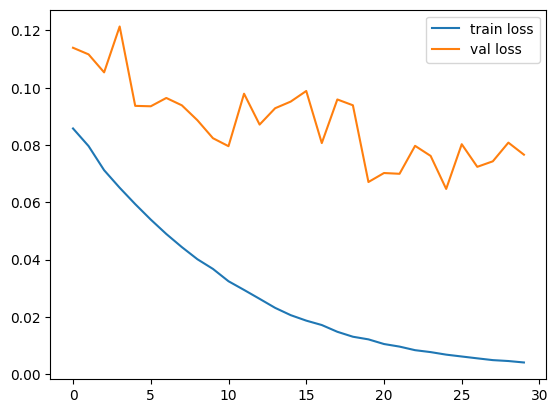

In [87]:
train_loss, val_loss, train_acc, test_acc = zip(*history)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend();

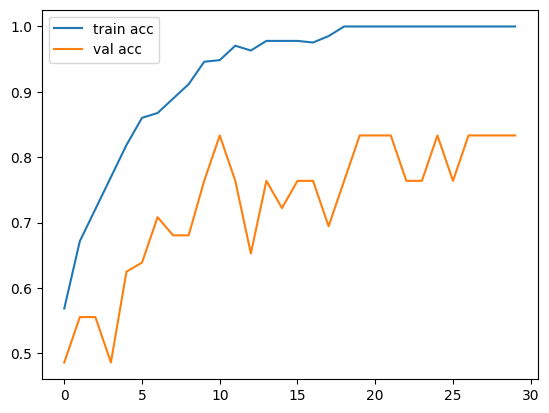

In [88]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='val acc')
plt.legend();

In [65]:
np.mean(test_acc)

0.76620376

In [81]:
torch.save(model.state_dict(), '../weights/gat_2heads_128_8_knn10.pt')

## Cross-validation

In [64]:
# GCN

from sklearn.model_selection import StratifiedKFold
from tqdm.notebook import tqdm

skf = StratifiedKFold(n_splits=10, shuffle=True)
eval_metrics = np.zeros((skf.n_splits, 3))

labels = [full_dataset[i].y for i in range(len(full_dataset))]


for n_fold, (train_idx, test_idx) in tqdm(enumerate(skf.split(labels, labels))):
    model = GCN(full_dataset.num_features, channels=[256, 32, 8], dropout=0.3).to(device())
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()
    scheduler = lr_scheduler.StepLR(optimizer, step_size=50//4, gamma=0.1, last_epoch=-1, verbose=False)

    train_loader_ = DataLoader(full_dataset[list(train_idx)], batch_size=8, shuffle=True)
    test_loader_ = DataLoader(full_dataset[list(test_idx)], batch_size=8, shuffle=True)
    min_v_loss = np.inf
    print(n_fold)
    pr, rc, acc = [], [], []
    for epoch in range(50):
        train_epoch(train_loader, model, criterion, optimizer)
        train_loss, train_acc, _, _ = eval_epoch(train_loader, model, criterion)
        val_loss, test_acc, _, _ = eval_epoch(val_loader, model, criterion)
        #scheduler.step()
        print(f'Epoch: {epoch:03d}, Train Loss: {train_loss:.4f}, Test Loss {val_loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        #print(f'Train Prec: {train_pr:.3f}, Train Rec: {train_rc:.3f}, Test Prec: {val_pr:.3f}, Test Rec: {val_rc:.3f}')
        #rc.append(val_rc)
        #pr.append(val_pr)
        acc.append(test_acc)
        if min_v_loss > val_loss:
            min_v_loss = val_loss
            best_test_acc = test_acc

    eval_metrics[n_fold, 0] = best_test_acc
    eval_metrics[n_fold, 1] = np.mean(acc)
    eval_metrics[n_fold, 2] = np.std(acc)
### eval_metrics[n_fold, 3] =

0it [00:00, ?it/s]

0
Epoch: 000, Train Loss: 0.0254, Test Loss 0.0371, Train Acc: 0.5188, Test Acc: 0.4211
Epoch: 001, Train Loss: 0.0245, Test Loss 0.0370, Train Acc: 0.5458, Test Acc: 0.4211
Epoch: 002, Train Loss: 0.0232, Test Loss 0.0369, Train Acc: 0.6854, Test Acc: 0.4737
Epoch: 003, Train Loss: 0.0218, Test Loss 0.0366, Train Acc: 0.8625, Test Acc: 0.5789
Epoch: 004, Train Loss: 0.0193, Test Loss 0.0357, Train Acc: 0.9875, Test Acc: 0.6842
Epoch: 005, Train Loss: 0.0165, Test Loss 0.0355, Train Acc: 1.0000, Test Acc: 0.6316
Epoch: 006, Train Loss: 0.0129, Test Loss 0.0359, Train Acc: 1.0000, Test Acc: 0.5789
Epoch: 007, Train Loss: 0.0098, Test Loss 0.0355, Train Acc: 1.0000, Test Acc: 0.6316
Epoch: 008, Train Loss: 0.0072, Test Loss 0.0350, Train Acc: 1.0000, Test Acc: 0.6316
Epoch: 009, Train Loss: 0.0050, Test Loss 0.0347, Train Acc: 1.0000, Test Acc: 0.6316
Epoch: 010, Train Loss: 0.0031, Test Loss 0.0347, Train Acc: 1.0000, Test Acc: 0.6316
Epoch: 011, Train Loss: 0.0022, Test Loss 0.0360, Tr

In [65]:
eval_metrics

array([[0.68421054, 0.61999995, 0.04856956],
       [0.63157892, 0.60842103, 0.05383878],
       [0.57894737, 0.50105268, 0.04109309],
       [0.63157892, 0.60736841, 0.05689081],
       [0.57894737, 0.59578943, 0.03712671],
       [0.52631581, 0.54315788, 0.03234165],
       [0.57894737, 0.66000003, 0.05689082],
       [0.68421054, 0.62210524, 0.02510917],
       [0.57894737, 0.58210522, 0.05511006],
       [0.63157892, 0.64736837, 0.06922604]])

In [ ]:
np.mean(eval_metrics[:, 1]), np.std(eval_metrics[:, 1])

In [66]:
# GAT

from sklearn.model_selection import StratifiedKFold
from tqdm.notebook import tqdm

skf = StratifiedKFold(n_splits=10, shuffle=True)
eval_metrics = np.zeros((skf.n_splits, 3))

labels = [full_dataset[i].y for i in range(len(full_dataset))]


for n_fold, (train_idx, test_idx) in tqdm(enumerate(skf.split(labels, labels))):
    model = GATv2(full_dataset.num_features, 128, 8).to(device())
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()
    scheduler = lr_scheduler.StepLR(optimizer, step_size=50//4, gamma=0.1, last_epoch=-1, verbose=False)

    train_loader_ = DataLoader(full_dataset[list(train_idx)], batch_size=8, shuffle=True)
    test_loader_ = DataLoader(full_dataset[list(test_idx)], batch_size=8, shuffle=True)
    min_v_loss = np.inf
    print(n_fold)
    pr, rc, acc = [], [], []
    for epoch in range(30):
        train_epoch(train_loader, model, criterion, optimizer)
        train_loss, train_acc, _, _ = eval_epoch(train_loader, model, criterion)
        val_loss, test_acc, _, _ = eval_epoch(val_loader, model, criterion)
        #scheduler.step()
        print(f'Epoch: {epoch:03d}, Train Loss: {train_loss:.4f}, Test Loss {val_loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        #print(f'Train Prec: {train_pr:.3f}, Train Rec: {train_rc:.3f}, Test Prec: {val_pr:.3f}, Test Rec: {val_rc:.3f}')
        #rc.append(val_rc)
        #pr.append(val_pr)
        acc.append(test_acc)
        if min_v_loss > val_loss:
            min_v_loss = val_loss
            best_test_acc = test_acc

    eval_metrics[n_fold, 0] = best_test_acc
    eval_metrics[n_fold, 1] = np.mean(acc)
    eval_metrics[n_fold, 2] = np.std(acc)
### eval_metrics[n_fold, 3] =

0it [00:00, ?it/s]

0
Epoch: 000, Train Loss: 0.0246, Test Loss 0.0361, Train Acc: 0.6812, Test Acc: 0.4211
Epoch: 001, Train Loss: 0.0234, Test Loss 0.0353, Train Acc: 0.7125, Test Acc: 0.4737
Epoch: 002, Train Loss: 0.0205, Test Loss 0.0336, Train Acc: 0.7979, Test Acc: 0.4211
Epoch: 003, Train Loss: 0.0167, Test Loss 0.0329, Train Acc: 0.8979, Test Acc: 0.5263
Epoch: 004, Train Loss: 0.0123, Test Loss 0.0333, Train Acc: 0.9688, Test Acc: 0.5789
Epoch: 005, Train Loss: 0.0084, Test Loss 0.0360, Train Acc: 0.9750, Test Acc: 0.6316
Epoch: 006, Train Loss: 0.0061, Test Loss 0.0393, Train Acc: 0.9875, Test Acc: 0.5263
Epoch: 007, Train Loss: 0.0037, Test Loss 0.0437, Train Acc: 0.9937, Test Acc: 0.5789
Epoch: 008, Train Loss: 0.0024, Test Loss 0.0469, Train Acc: 1.0000, Test Acc: 0.5263
Epoch: 009, Train Loss: 0.0015, Test Loss 0.0484, Train Acc: 1.0000, Test Acc: 0.6316
Epoch: 010, Train Loss: 0.0008, Test Loss 0.0498, Train Acc: 1.0000, Test Acc: 0.5789
Epoch: 011, Train Loss: 0.0006, Test Loss 0.0526, Tr

In [67]:
eval_metrics

array([[0.52631581, 0.53508765, 0.05099803],
       [0.47368422, 0.56842101, 0.05985516],
       [0.52631581, 0.60350871, 0.04015971],
       [0.57894737, 0.55789471, 0.03985198],
       [0.57894737, 0.54736841, 0.03985198],
       [0.68421054, 0.70701736, 0.05381706],
       [0.63157892, 0.65263146, 0.04210527],
       [0.47368422, 0.57894731, 0.06374   ],
       [0.57894737, 0.67543846, 0.04315219],
       [0.57894737, 0.52982455, 0.01889531]])

In [ ]:
np.mean(eval_metrics[:, 1]), np.std(eval_metrics[:, 1])

## Explainability

In [ ]:
from captum.attr import Saliency, IntegratedGradients

def model_forward(edge_mask, data):
    batch = torch.zeros(data.x.shape[0], dtype=int).to(device())
    out = model(data) # .x, data.edge_index, batch, edge_mask
    return out


def explain(method, data, target=0):
    input_mask = torch.ones(data.edge_index.shape[1]).requires_grad_(True).to(device)
    if method == 'ig':
        ig = IntegratedGradients(model_forward)
        mask = ig.attribute(input_mask, target=target,
                            additional_forward_args=(data,),
                            internal_batch_size=data.edge_index.shape[1])
    elif method == 'saliency':
        saliency = Saliency(model_forward)
        mask = saliency.attribute(input_mask, target=target,
                                  additional_forward_args=(data,))
    else:
        raise Exception('Unknown explanation method')

    edge_mask = np.abs(mask.cpu().detach().numpy())
    if edge_mask.max() > 0:  # avoid division by zero
        edge_mask = edge_mask / edge_mask.max()
    return edge_mask